In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sys.path.append("../scripts")
from utils import Utils
from clean_data import DataCleaner

cleaner = DataCleaner()
utility = Utils()

In [2]:
cleaned_df=utility.load_data("../data/cleaned_data.csv")
# since our csv file doesn't have a meta data of columns dtype, we manually convert ['bearer_id', 'imsi', 'msisdn/number', 'imei','handset_type'] to string once again
cleaned_df=cleaner.convert_to_string(cleaned_df)

In [3]:
cleaned_df.shape

(150001, 55)

In [4]:
cleaned_df.isnull().sum().sum()

0

In [5]:
#Group data by MSISDN
msisdn_group = cleaned_df.groupby("msisdn/number")

session Frequency

In [26]:
session_freq=msisdn_group.agg({"bearer_id":"count"})

session_freq.rename(columns={"bearer_id":"session_frequency"},inplace=True)

session_freq.sort_values(by=["session_frequency"],ascending=False,inplace=True)
session_freq.drop(['nan'],axis=0,inplace=True)
session_freq.head(10)

,session_frequency
msisdn/number,
33626320676.0,18
33625779332.0,17
33614892860.0,17
33659725664.0,16
33760536639.0,15
33675877202.0,15
33667163239.0,13
33604515716.0,12
33786323068.0,12


session duration

In [28]:
session_dur=msisdn_group.agg({"dur._(ms)":"sum"})
session_dur.rename(columns={"dur._(ms)":"duration_ms"},inplace=True)
session_dur.sort_values(by=['duration_ms'],ascending=False,inplace=True)
session_dur.drop(['nan'],axis=0,inplace=True)
session_dur.head(10)

,duration_ms
msisdn/number,
33625779332.0,18553754.0
33614892860.0,9966898.0
33760536639.0,9279434.0
33626320676.0,8791927.0
33667163239.0,8744914.0
33662840755.0,6614270.0
33664693736.0,6288730.0
33603127838.0,6287761.0
33667456716.0,5649882.0


In [31]:
cleaned_df["grand_total"]=cleaned_df['total_ul_(bytes)']+cleaned_df['total_dl_(bytes)']
total_data=msisdn_group.agg({'total_ul_(bytes)':'sum','total_dl_(bytes)':'sum'})
total_data['grand_total_(bytes)']=total_data['total_ul_(bytes)']+total_data['total_dl_(bytes)']
total_data.sort_values(by=['grand_total_(bytes)'],ascending=False,inplace=True)
total_data.drop(['nan'],axis=0,inplace=True)
total_data.head(10)

,total_ul_(bytes),total_dl_(bytes),grand_total_(bytes)
msisdn/number,,,
33614892860.0,689483001.0,8.156743e+09,8.846226e+09
33760536639.0,703478581.0,7.811295e+09,8.514774e+09
33625779332.0,729577380.0,7.770043e+09,8.499621e+09
33626320676.0,669650721.0,7.301517e+09,7.971167e+09
33675877202.0,581568792.0,7.309542e+09,7.891111e+09
33659725664.0,624260321.0,7.081602e+09,7.705863e+09
33666464084.0,405060976.0,6.903440e+09,7.308501e+09
33760413819.0,521518890.0,6.610852e+09,7.132371e+09
33664712899.0,471244453.0,6.400774e+09,6.872018e+09


In [34]:

# Aggregate User Engagement Metric
user_engagement = msisdn_group.agg({'grand_total': 'sum', 'dur._(ms)': 'sum','bearer_id': 'count'})
user_engagement = user_engagement.rename(columns={'grand_total': 'session_traffic(bytes)', 'dur._(ms)': 'session_duration(ms)', 'bearer_id': 'session_freq'})
user_engagement.drop(['nan'],axis=0,inplace=True)
user_engagement


,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
3197020876596.0,2.321240e+08,877385.0,1
33601001722.0,8.786906e+08,116720.0,1
33601001754.0,1.568596e+08,181230.0,1
33601002511.0,5.959665e+08,134969.0,1
33601007832.0,4.223207e+08,49878.0,1
...,...,...,...
33789967113.0,2.081231e+08,160461.0,1
33789980299.0,1.094693e+09,210389.0,2
33789996170.0,7.146416e+08,8810.0,1


## Top 10 customers per engagement metric

In [48]:


# print("Top 10 Customers per engagement by Session Traffic")
# print(user_engagement.sort_values(by=['session_traffic(bytes)'],ascending=False).head(10))
# print()

# print("Top 10 Customers per engagement by Session Duration")
# print(user_engagement.sort_values(by=['session_duration(ms)'],ascending=False).head(10))
# print()

# print("Top 10 Customers per engagement by Session Frequency")
# print(user_engagement.sort_values(by=['session_freq'],ascending=False).head(10))
# print()

### by session_traffic

In [37]:
user_engagement.sort_values(by=['session_traffic(bytes)'],ascending=False).head(10)

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
33614892860.0,8.846226e+09,9966898.0,17
33760536639.0,8.514774e+09,9279434.0,15
33625779332.0,8.499621e+09,18553754.0,17
33626320676.0,7.971167e+09,8791927.0,18
33675877202.0,7.891111e+09,4865947.0,15
33659725664.0,7.705863e+09,4035428.0,16
33666464084.0,7.308501e+09,4536757.0,11
33760413819.0,7.132371e+09,5321667.0,12
33664712899.0,6.872018e+09,2927785.0,11


### by session_duration

In [38]:
user_engagement.sort_values(by=['session_duration(ms)'],ascending=False).head(10)

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
33625779332.0,8.499621e+09,18553754.0,17
33614892860.0,8.846226e+09,9966898.0,17
33760536639.0,8.514774e+09,9279434.0,15
33626320676.0,7.971167e+09,8791927.0,18
33667163239.0,5.618394e+09,8744914.0,13
33662840755.0,4.000098e+09,6614270.0,9
33664693736.0,5.682007e+09,6288730.0,9
33603127838.0,4.976195e+09,6287761.0,12
33667456716.0,2.600522e+09,5649882.0,6


### by session_freq

In [39]:
user_engagement.sort_values(by=['session_freq'],ascending=False).head(10)

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
33626320676.0,7.971167e+09,8791927.0,18
33614892860.0,8.846226e+09,9966898.0,17
33625779332.0,8.499621e+09,18553754.0,17
33659725664.0,7.705863e+09,4035428.0,16
33760536639.0,8.514774e+09,9279434.0,15
33675877202.0,7.891111e+09,4865947.0,15
33667163239.0,5.618394e+09,8744914.0,13
33627080969.0,5.754731e+09,4703516.0,12
33604515716.0,5.487855e+09,5207990.0,12


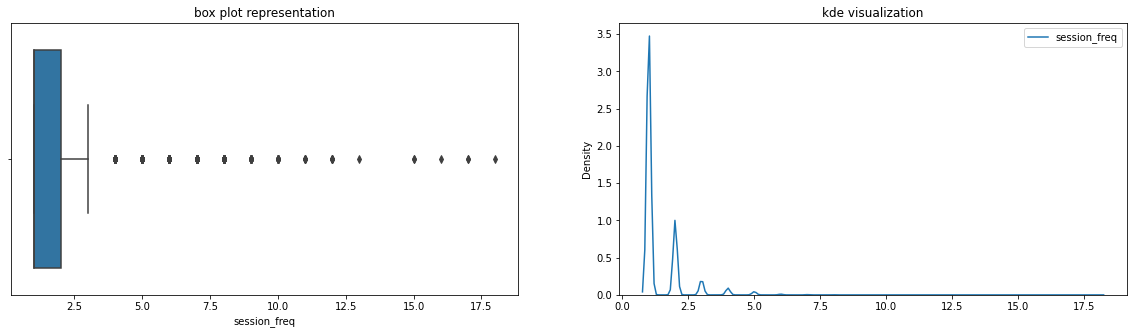

In [70]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=user_engagement[['session_freq']],x="session_freq")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=user_engagement[['session_freq']])

plt.show()

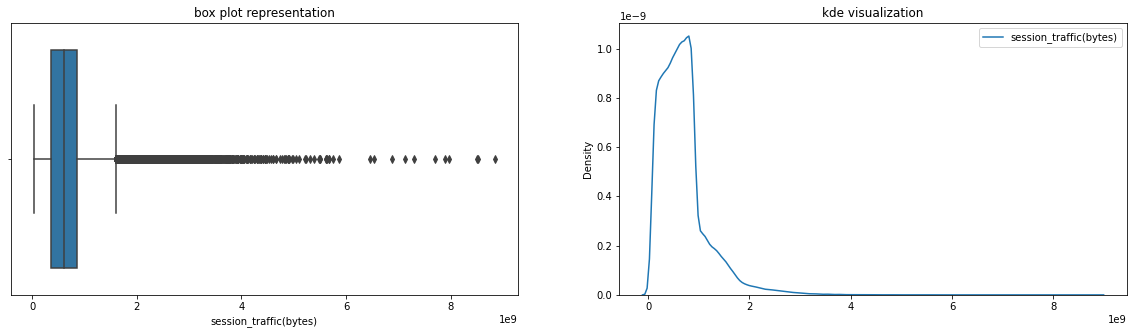

In [71]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=user_engagement[['session_traffic(bytes)']],x="session_traffic(bytes)")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=user_engagement[['session_traffic(bytes)']])

plt.show()

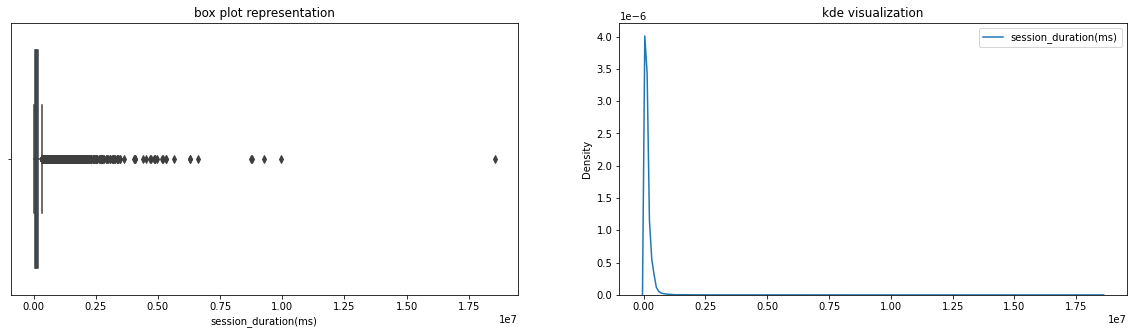

In [72]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=user_engagement[['session_duration(ms)']],x="session_duration(ms)")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=user_engagement[['session_duration(ms)']])

plt.show()